<a href="https://colab.research.google.com/github/reshminambiar/DW15_Task6/blob/main/Assignment5_6_7_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.shape

(15, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df['Ground Temperature'].values.reshape(-1,1)
Y = df['Chirps/Second'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))

Intercept:[0.45931465] ,Coefficients:[[0.20299973]]


In [ ]:
eq = "y = {}*x  + {}".format(model.coef_[0],model.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y = [0.20299973]*x  + [0.45931465]


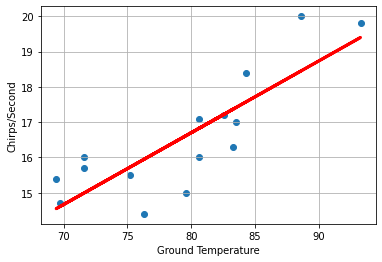

In [ ]:
#2. Plotting the original data and the regression line
plt.scatter(X,Y)
plt.plot(X, model.predict(X), color="red", linewidth=3)
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.grid()
plt.show()

In [ ]:
model.score(X,Y) #3. r2 score of the model

0.6922946529146998

In [ ]:
#4. If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
model.predict([[95]]) 
#It can be approximately calculated from the plot too

array([[19.74428913]])

In [ ]:
#With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.
# What was the approximate ground temperature that morning?
#x = (y-c)/m
temperature = (18 - 0.45931465)/0.20299973 
temperature
#It can be approximately calculated from the plot too

86.40743192121488

###Conclusion
We get an R2 score of 0.69 only for this model. It is not sufficient to establish a strong correlation.However, with the available data we can see that there is some positive linear relation between the ground temperatures and chirp frequency.With the availability of more data, we could come up with a better model for the same

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.shape

(62, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df['Brain'].values.reshape(-1,1)
Y = df['Body'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))

Intercept:[91.00439621] ,Coefficients:[[0.96649637]]


In [ ]:
eq = "y= {}*x  + {}".format(model.coef_,model.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y= [[0.96649637]]*x  + [91.00439621]


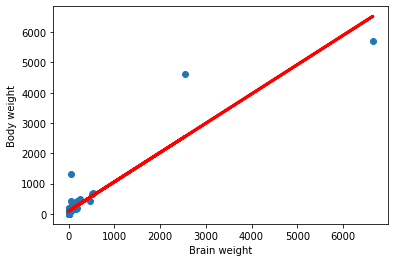

In [ ]:
plt.scatter(X,Y)
plt.plot(X, model.predict(X), color="red", linewidth=3)
plt.xlabel("Brain weight")
plt.ylabel("Body weight")
plt.show()

In [ ]:
model.score(X,Y) #r2 score of the model

0.8726620843043331

The plot shows that the brain and body weight are positively correlated and r2 score of 0.87 indicates that this equation is a good fit for the data.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

Downloading the necessary packages,reading the file and going through the dataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.shape

(52, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


Task 1

In [ ]:
input_cols = ['Sex','Rank','Year','Degree','YSdeg']
output_col = 'Salary'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df.iloc[:,:5]
Y = df.iloc[:,5]
model = LinearRegression()
model.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))

Intercept:11410.14654725559 ,Coefficients:[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [ ]:
eq = "Salary = {}*{} + {}*{} + {}*{} + {}*{} + {}*{} + {}".format(input_cols[0],model.coef_[0],input_cols[1],model.coef_[1],input_cols[2],model.coef_[2],input_cols[3],model.coef_[3],input_cols[4],model.coef_[4],model.intercept_)
print("The linear equation is \n",eq)

The linear equation is 
 Salary = Sex*1241.792499601427 + Rank*5586.1814495214385 + Year*482.85976782882153 + Degree*-1331.6440634059095 + YSdeg*-128.79057354486122 + 11410.14654725559


In [ ]:
print(model.score(X,Y))

0.8547180674410969


Task 2

In [ ]:
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [ ]:
combos = input_combos(input_cols)

In [ ]:
def combo_r2scores( all_combos, df, output='Salary'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Salary']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [ ]:
combo_r2scores(combos,df,'Salary')

{0.004861680984748373: ('Degree',),
 0.06389892583288004: ('Sex',),
 0.06643739842018881: ('Sex', 'Degree'),
 0.45542813458360276: ('YSdeg',),
 0.49093702676921624: ('Year',),
 0.4911360941886388: ('Sex', 'Year'),
 0.4919014149016441: ('Year', 'Degree'),
 0.49207944757472966: ('Sex', 'Year', 'Degree'),
 0.4930479271966782: ('Sex', 'YSdeg'),
 0.5409662288237875: ('Degree', 'YSdeg'),
 0.5782019226431887: ('Year', 'YSdeg'),
 0.5808063918180405: ('Sex', 'Year', 'YSdeg'),
 0.5832708257660315: ('Sex', 'Degree', 'YSdeg'),
 0.6236261611533503: ('Year', 'Degree', 'YSdeg'),
 0.6311597502907436: ('Sex', 'Year', 'Degree', 'YSdeg'),
 0.7525360539274633: ('Rank',),
 0.7554917749443394: ('Sex', 'Rank'),
 0.7557961688386643: ('Rank', 'Degree'),
 0.7583144768153613: ('Sex', 'Rank', 'Degree'),
 0.7623948189698249: ('Rank', 'YSdeg'),
 0.7625149185326454: ('Rank', 'Degree', 'YSdeg'),
 0.7666122610227071: ('Sex', 'Rank', 'YSdeg'),
 0.7671813414350668: ('Sex', 'Rank', 'Degree', 'YSdeg'),
 0.8436480933264597

With this we can see that the combination of all 5 input columns gives the maximum r2 score. Rank and Year together seems to be a great combination because with only these 2 columns we reach an r2 score of 0.843

Task 3

At the very first instance, the model with only sex as the input column has an r2score of just 0.063 which shows it has no direct influence on salary. But before reaching a conclusion we need to consider other factors like Rank,Year etc.

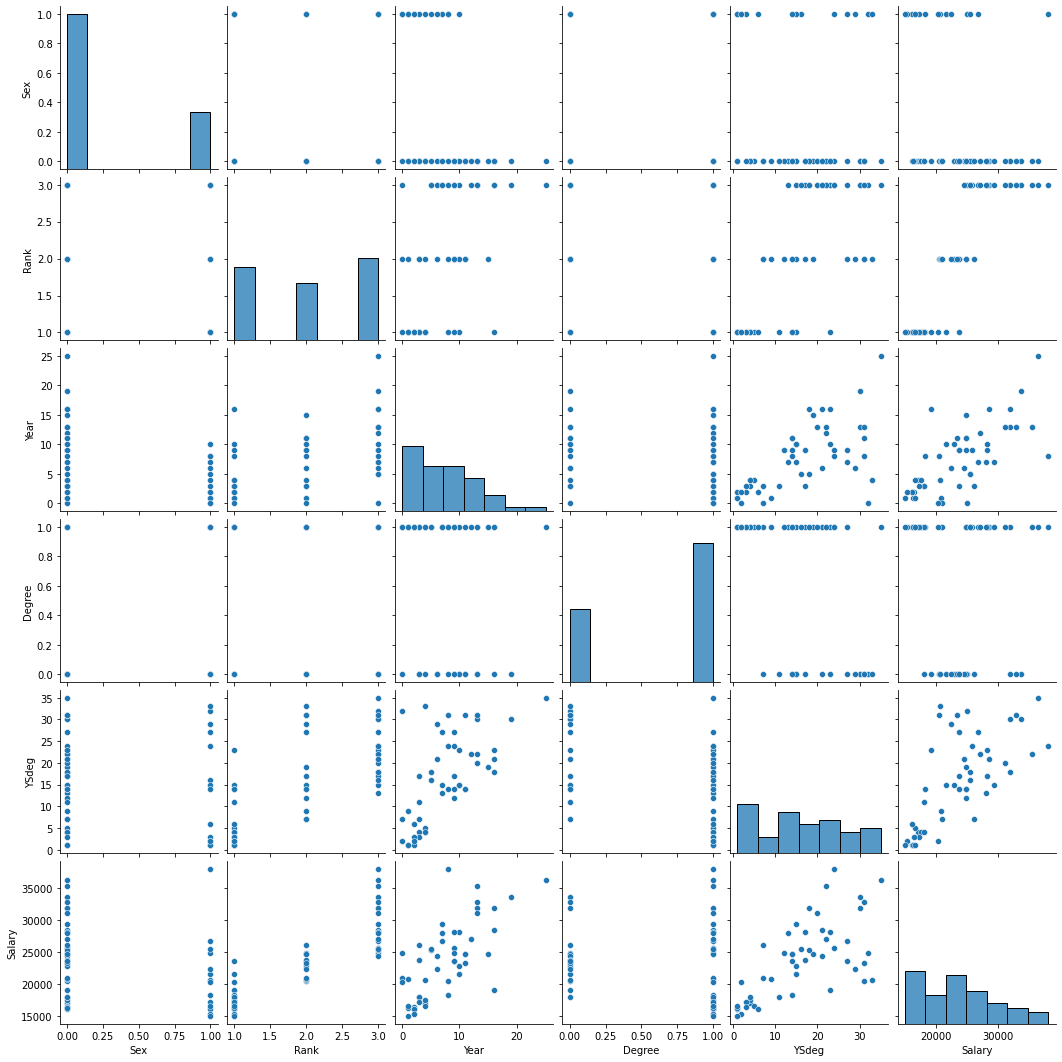

In [ ]:
#This is to get a good feel for the data
sns.pairplot(df)

We can see that years in the same rank and years after highest degree and rank itself have strong positive relation with salary.Also we have data in all degree and ranks for both male and female

In [ ]:
df.Sex.value_counts() #Almost 2/3rd of the datapoints are male

0    38
1    14
Name: Sex, dtype: int64

In [ ]:
df.groupby(['Sex','Rank','Degree'])['Salary'].mean()
#Here salary is fairly distributed among these combinations.But we need to consider years too for a better understanding

Sex  Rank  Degree
0    1     0         20296.000000
           1         16901.142857
     2     0         23584.571429
           1         23246.200000
     3     0         30711.500000
           1         29592.750000
1    1     0         21600.000000
           1         17005.714286
     2     0         21570.000000
     3     0         24900.000000
           1         30106.666667
Name: Salary, dtype: float64

In [ ]:
male = df[df['Sex'] == 0]
female = df[df['Sex'] == 1]

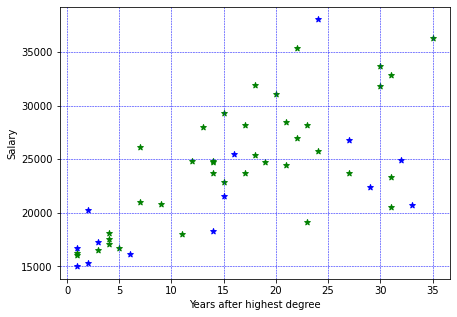

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(male['YSdeg'],male['Salary'],color='g', marker='*' )
plt.scatter(female['YSdeg'],female['Salary'],color='b', marker='*' )
plt.xlabel("Years after highest degree")
plt.ylabel("Salary")
plt.grid(linestyle="--", linewidth='0.5', color='b')
plt.show()
#Although we can't find a conclusion here, I am trying to see if the data is available for both sex in the whole range

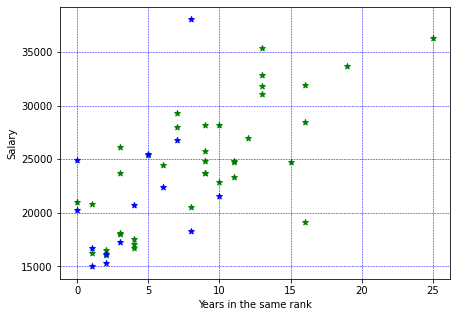

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(male['Year'],male['Salary'],color='g', marker='*' )
plt.scatter(female['Year'],female['Salary'],color='b', marker='*' )
plt.xlabel("Years in the same rank")
plt.ylabel("Salary")
plt.grid(linestyle="--", linewidth='0.5', color='b')
plt.show()
#Although we can't find a conclusion here, I am trying to see if the data is available for both sex in the whole range
#Here we can see that the data for female professors is available only upto 10 years in the same rank

So for better results, I make a dataframe for year<=10 and make a model on it to see if Sex has an influence on salary

In [ ]:
df_year = df[df['Year']<=10]

In [ ]:
X = df_year.iloc[:,:5]
Y = df_year.iloc[:,5]
model = LinearRegression()
model.fit(X,Y)
model.score(X,Y)

0.7968248819660304

In [ ]:
combo_r2scores(combos,df_year,'Salary')

{0.006877700561349731: ('Sex',),
 0.01327225187005543: ('Degree',),
 0.019252695844517165: ('Sex', 'Degree'),
 0.32534791979498534: ('Year',),
 0.32547258856854433: ('Year', 'Degree'),
 0.325988256704955: ('Sex', 'Year'),
 0.3261084635012448: ('Sex', 'Year', 'Degree'),
 0.38329194186217797: ('YSdeg',),
 0.4042796870122093: ('Sex', 'YSdeg'),
 0.4448739733320236: ('Degree', 'YSdeg'),
 0.46069130390981783: ('Year', 'YSdeg'),
 0.46515893607776626: ('Sex', 'Year', 'YSdeg'),
 0.47582422204482044: ('Sex', 'Degree', 'YSdeg'),
 0.5106317178170396: ('Year', 'Degree', 'YSdeg'),
 0.5211388967522836: ('Sex', 'Year', 'Degree', 'YSdeg'),
 0.7221603677648399: ('Rank',),
 0.7224004990910746: ('Sex', 'Rank'),
 0.7237599305119999: ('Rank', 'YSdeg'),
 0.7237917566538923: ('Sex', 'Rank', 'YSdeg'),
 0.7262952984826756: ('Rank', 'Degree'),
 0.7263171650507368: ('Rank', 'Degree', 'YSdeg'),
 0.7266289950954575: ('Sex', 'Rank', 'Degree'),
 0.7267866959953191: ('Sex', 'Rank', 'Degree', 'YSdeg'),
 0.7781255458296

Here the r2 score for only sex as input is very nominal at 0.006 which indicates it has no much effect on salary

In [ ]:
#For proffesors in the same rank and degree we can see comparable salary values for both male and female
df_year.groupby(['Rank','Degree','Sex'])['Salary'].mean()

Rank  Degree  Sex
1     0       0      20856.500000
              1      21600.000000
      1       0      16901.142857
              1      17005.714286
2     0       0      23410.000000
              1      21570.000000
      1       0      22227.000000
3     0       0      24450.000000
              1      24900.000000
      1       0      27474.833333
              1      30106.666667
Name: Salary, dtype: float64

I am just creating a dataframe suitable for sunburst plot to show mean salary for all combinations of rank,degree and sex

In [ ]:
x = pd.DataFrame(df_year.groupby(['Rank','Degree','Sex'])['Salary'].mean())

In [ ]:
c = df_year.groupby(['Rank','Degree','Sex'])
c.groups

{(1, 0, 0): [32, 41], (1, 0, 1): [30], (1, 1, 0): [37, 38, 39, 40, 44, 45, 48], (1, 1, 1): [36, 43, 46, 47, 49, 50, 51], (2, 0, 0): [13, 18, 21, 28, 29], (2, 0, 1): [33, 34], (2, 1, 0): [24, 35, 42], (3, 0, 0): [19], (3, 0, 1): [6], (3, 1, 0): [2, 12, 14, 15, 22, 25], (3, 1, 1): [3, 23, 27]}

In [ ]:
df_sunburst2 = pd.DataFrame(data=c.groups.keys(), columns=['Rank','Degree','Sex'])
df_sunburst2['Salary']= x.values

In [ ]:
df_sunburst2

,Rank,Degree,Sex,Salary
0,1,0,0,20856.500000
1,1,0,1,21600.000000
2,1,1,0,16901.142857
3,1,1,1,17005.714286
4,2,0,0,23410.000000
5,2,0,1,21570.000000
6,2,1,0,22227.000000
7,3,0,0,24450.000000
8,3,0,1,24900.000000
9,3,1,0,27474.833333


In [ ]:
df_sunburst2['Sex'] = df_sunburst2['Sex'].map({0:"Male",1:"Female"})
df_sunburst2['Rank'] = df_sunburst2['Rank'].map({1:"Assistant Prof.",2:"Associate Prof", 3:"Full Prof."})
df_sunburst2['Degree'] = df_sunburst2['Degree'].map({0:"Master's",1:"Doctorate"})
df_sunburst2

,Rank,Degree,Sex,Salary
0,Assistant Prof.,Master's,Male,20856.500000
1,Assistant Prof.,Master's,Female,21600.000000
2,Assistant Prof.,Doctorate,Male,16901.142857
3,Assistant Prof.,Doctorate,Female,17005.714286
4,Associate Prof,Master's,Male,23410.000000
5,Associate Prof,Master's,Female,21570.000000
6,Associate Prof,Doctorate,Male,22227.000000
7,Full Prof.,Master's,Male,24450.000000
8,Full Prof.,Master's,Female,24900.000000
9,Full Prof.,Doctorate,Male,27474.833333


In [ ]:
import plotly.express as px
fig=px.sunburst(df_sunburst2,path=['Sex','Rank','Degree'],values='Salary')
fig.show()

From the above plot we can find the mean salary for any combination and notice that they are fairly equally distributed and there is no visible discrimination by sex. Our model, plots and all the analysis done above supports that
###Conclusion: Sex is not a factor in salary.